In [7]:
import sys
sys.path.append('./modules')
import clean_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("./data/02-processed/preprocessed_anime_data.csv")

### Number of anime produced per year (Slice of Life vs Shounen)

Text(0.5, 1.0, 'Anime Produced per year (Shounen/Slice of Life)')

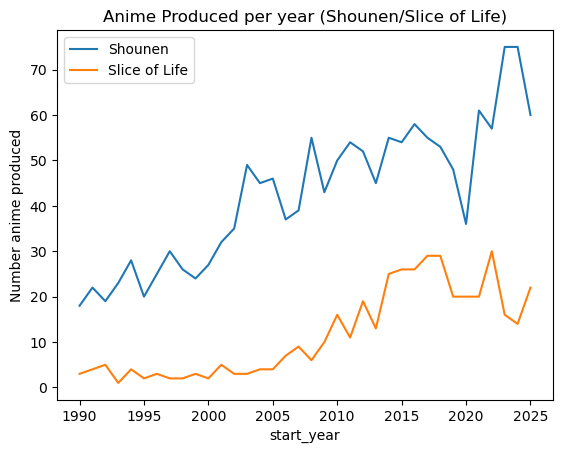

In [13]:
#creates a dataframe with total Shounen and Slice of Life produced per year respectively
cleaned_data = data.groupby('start_year')[['is_shounen','is_slice_of_life']].sum().reset_index()

#filters out anime from before 1990 and after 2025
cleaned_data = cleaned_data[(cleaned_data['start_year'] >= 1990) & (cleaned_data['start_year'] <= 2025)]

#plot generation 
sns.lineplot(data = cleaned_data,x='start_year',y='is_shounen',label = 'Shounen')
sns.lineplot(data = cleaned_data,x='start_year',y='is_slice_of_life',label = 'Slice of Life')
plt.ylabel("Number anime produced")
plt.title('Anime Produced per year (Shounen/Slice of Life)')

### Genre Frequency (Slice of Life vs Shounen)

In [9]:
#cleaning data but leaving all genres instead of just Shounen and Slice of Life
df = clean_data.filter_cols(data)
genres_to_analyze = (clean_data.SHOUNEN_TAG, clean_data.SLICE_OF_LIFE_TAG)
df = clean_data.gen_binary_categories(df=df, tags_to_check=genres_to_analyze)
df = clean_data.add_airing_date_features(df)
df = clean_data.seconds_to_mins(df, "duration")

Text(0.5, 1.0, 'Genre Market Share (Slice of Life vs Shounen')

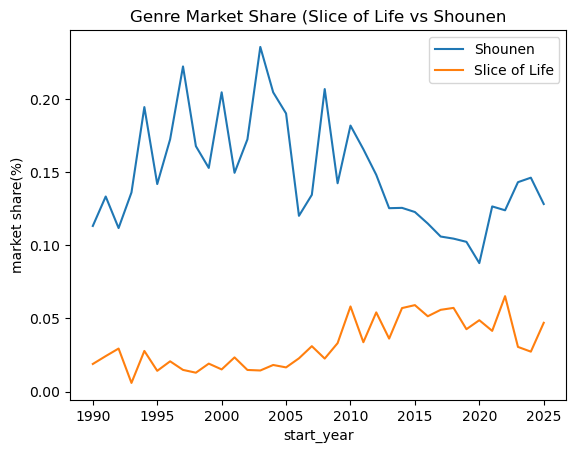

In [11]:
#filters out anime from before 1990 and after 2025
df = df[(df['start_year'] >= 1990) & (df['start_year'] <= 2025)]

#sum total Slice of Life,Shounen and total anime per year respectively
two_genre_yearly = df.groupby('start_year')[['is_shounen','is_slice_of_life']].sum()
all_genre_yearly = df.groupby('start_year').size()

#creates proportions for chosen genres vs all genres per year
two_genre_proportions = two_genre_yearly.div(all_genre_yearly,axis = 0)

#plot generation 
sns.lineplot(data = two_genre_proportions,x='start_year',y='is_shounen',label = 'Shounen')
sns.lineplot(data = two_genre_proportions,x='start_year',y='is_slice_of_life',label = 'Slice of Life')
plt.ylabel("market share(%)")
plt.title('Genre Market Share (Slice of Life vs Shounen')